In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


In [3]:
data = pd.read_csv('my_PJME_MW.csv', index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [4]:
data_m = data.resample('M').mean()
data_m.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258


In [5]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 6)
SARIMAX: (0, 0, 1) x (0, 0, 2, 6)
SARIMAX: (0, 0, 2) x (0, 1, 0, 6)
SARIMAX: (0, 0, 2) x (0, 1, 1, 6)


In [6]:
import warnings

warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 6)3 - AIC:4416.269672223332
ARIMA(0, 0, 0)x(0, 0, 1, 6)3 - AIC:4156.427324595839
ARIMA(0, 0, 0)x(0, 0, 2, 6)3 - AIC:3987.73023822365
ARIMA(0, 0, 0)x(0, 1, 0, 6)3 - AIC:3398.419994288184
ARIMA(0, 0, 0)x(0, 1, 1, 6)3 - AIC:3208.7743033366646
ARIMA(0, 0, 0)x(0, 1, 2, 6)3 - AIC:3048.933911813615
ARIMA(0, 0, 0)x(0, 2, 0, 6)3 - AIC:3505.8750620848728
ARIMA(0, 0, 0)x(0, 2, 1, 6)3 - AIC:3266.1275350258666
ARIMA(0, 0, 0)x(0, 2, 2, 6)3 - AIC:3114.8410244072575
ARIMA(0, 0, 0)x(1, 0, 0, 6)3 - AIC:3423.7999568485316
ARIMA(0, 0, 0)x(1, 0, 1, 6)3 - AIC:3393.1202246102257
ARIMA(0, 0, 0)x(1, 0, 2, 6)3 - AIC:3176.738838353049
ARIMA(0, 0, 0)x(1, 1, 0, 6)3 - AIC:3149.157409332891
ARIMA(0, 0, 0)x(1, 1, 1, 6)3 - AIC:3131.6099376403263
ARIMA(0, 0, 0)x(1, 1, 2, 6)3 - AIC:3021.7214259236707
ARIMA(0, 0, 0)x(1, 2, 0, 6)3 - AIC:3179.2056399168837
ARIMA(0, 0, 0)x(1, 2, 1, 6)3 - AIC:3152.0045542961943
ARIMA(0, 0, 0)x(1, 2, 2, 6)3 - AIC:3009.22087959247
ARIMA(0, 0, 0)x(2, 0, 0, 6)3 - AIC:315

ARIMA(0, 1, 2)x(2, 0, 0, 6)3 - AIC:3135.5888328654673
ARIMA(0, 1, 2)x(2, 0, 1, 6)3 - AIC:3111.6638092391613
ARIMA(0, 1, 2)x(2, 0, 2, 6)3 - AIC:3048.075440636185
ARIMA(0, 1, 2)x(2, 1, 0, 6)3 - AIC:3022.964438683968
ARIMA(0, 1, 2)x(2, 1, 1, 6)3 - AIC:2994.8402448312645
ARIMA(0, 1, 2)x(2, 1, 2, 6)3 - AIC:2939.388066678218
ARIMA(0, 1, 2)x(2, 2, 0, 6)3 - AIC:3024.026422437043
ARIMA(0, 1, 2)x(2, 2, 1, 6)3 - AIC:2962.298614511167
ARIMA(0, 1, 2)x(2, 2, 2, 6)3 - AIC:2895.8297948305626
ARIMA(0, 2, 0)x(0, 0, 0, 6)3 - AIC:3602.608455766283
ARIMA(0, 2, 0)x(0, 0, 1, 6)3 - AIC:3455.0662427554685
ARIMA(0, 2, 0)x(0, 0, 2, 6)3 - AIC:3304.361685144955
ARIMA(0, 2, 0)x(0, 1, 0, 6)3 - AIC:3455.5979515595554
ARIMA(0, 2, 0)x(0, 1, 1, 6)3 - AIC:3281.423989951082
ARIMA(0, 2, 0)x(0, 1, 2, 6)3 - AIC:3167.0398950550452
ARIMA(0, 2, 0)x(0, 2, 0, 6)3 - AIC:3532.2715005858636
ARIMA(0, 2, 0)x(0, 2, 1, 6)3 - AIC:3299.9308220587895
ARIMA(0, 2, 0)x(0, 2, 2, 6)3 - AIC:3064.5149932634317
ARIMA(0, 2, 0)x(1, 0, 0, 6)3 - AIC:3

ARIMA(1, 0, 2)x(1, 0, 1, 6)3 - AIC:3294.130395733583
ARIMA(1, 0, 2)x(1, 0, 2, 6)3 - AIC:3180.0076865993165
ARIMA(1, 0, 2)x(1, 1, 0, 6)3 - AIC:3108.435594136991
ARIMA(1, 0, 2)x(1, 1, 1, 6)3 - AIC:3066.6870634698794
ARIMA(1, 0, 2)x(1, 1, 2, 6)3 - AIC:2950.0745166300094
ARIMA(1, 0, 2)x(1, 2, 0, 6)3 - AIC:3165.440950938313
ARIMA(1, 0, 2)x(1, 2, 1, 6)3 - AIC:3031.19529165625
ARIMA(1, 0, 2)x(1, 2, 2, 6)3 - AIC:2890.1119792179093
ARIMA(1, 0, 2)x(2, 0, 0, 6)3 - AIC:3140.270319249066
ARIMA(1, 0, 2)x(2, 0, 1, 6)3 - AIC:3212.877484293415
ARIMA(1, 0, 2)x(2, 0, 2, 6)3 - AIC:3176.824643961418
ARIMA(1, 0, 2)x(2, 1, 0, 6)3 - AIC:3004.5910369225676
ARIMA(1, 0, 2)x(2, 1, 1, 6)3 - AIC:3006.437002719995
ARIMA(1, 0, 2)x(2, 1, 2, 6)3 - AIC:2972.8114623840484
ARIMA(1, 0, 2)x(2, 2, 0, 6)3 - AIC:2998.8445047198193
ARIMA(1, 0, 2)x(2, 2, 1, 6)3 - AIC:3020.798484467243
ARIMA(1, 0, 2)x(2, 2, 2, 6)3 - AIC:2989.5303296184306
ARIMA(1, 1, 0)x(0, 0, 0, 6)3 - AIC:3546.4538282504063
ARIMA(1, 1, 0)x(0, 0, 1, 6)3 - AIC:339

ARIMA(1, 2, 2)x(0, 0, 2, 6)3 - AIC:3181.1177713359457
ARIMA(1, 2, 2)x(0, 1, 0, 6)3 - AIC:3306.1592376857525
ARIMA(1, 2, 2)x(0, 1, 1, 6)3 - AIC:3140.3148042189614
ARIMA(1, 2, 2)x(0, 1, 2, 6)3 - AIC:3027.2140993679645
ARIMA(1, 2, 2)x(0, 2, 0, 6)3 - AIC:3380.676246597477
ARIMA(1, 2, 2)x(0, 2, 1, 6)3 - AIC:3108.7489514285617
ARIMA(1, 2, 2)x(0, 2, 2, 6)3 - AIC:3075.814877423593
ARIMA(1, 2, 2)x(1, 0, 0, 6)3 - AIC:3307.7925345633694
ARIMA(1, 2, 2)x(1, 0, 1, 6)3 - AIC:3232.5926228907674
ARIMA(1, 2, 2)x(1, 0, 2, 6)3 - AIC:3113.7126097518576
ARIMA(1, 2, 2)x(1, 1, 0, 6)3 - AIC:3162.207536977705
ARIMA(1, 2, 2)x(1, 1, 1, 6)3 - AIC:3137.04369894692
ARIMA(1, 2, 2)x(1, 1, 2, 6)3 - AIC:3021.3755073283132
ARIMA(1, 2, 2)x(1, 2, 0, 6)3 - AIC:3244.2140292111403
ARIMA(1, 2, 2)x(1, 2, 1, 6)3 - AIC:3083.4404037201707
ARIMA(1, 2, 2)x(1, 2, 2, 6)3 - AIC:3016.283127222532
ARIMA(1, 2, 2)x(2, 0, 0, 6)3 - AIC:3149.129246226031
ARIMA(1, 2, 2)x(2, 0, 1, 6)3 - AIC:3144.3466158102265
ARIMA(1, 2, 2)x(2, 0, 2, 6)3 - AIC:

ARIMA(2, 1, 1)x(2, 1, 0, 6)3 - AIC:2994.0566453323377
ARIMA(2, 1, 1)x(2, 1, 1, 6)3 - AIC:2960.6353284021625
ARIMA(2, 1, 1)x(2, 1, 2, 6)3 - AIC:2956.3929544539333
ARIMA(2, 1, 1)x(2, 2, 0, 6)3 - AIC:2987.747357790408
ARIMA(2, 1, 1)x(2, 2, 1, 6)3 - AIC:2922.3350017011053
ARIMA(2, 1, 1)x(2, 2, 2, 6)3 - AIC:2980.7654430921543
ARIMA(2, 1, 2)x(0, 0, 0, 6)3 - AIC:3327.6161806059395
ARIMA(2, 1, 2)x(0, 0, 1, 6)3 - AIC:3182.3862201786974
ARIMA(2, 1, 2)x(0, 0, 2, 6)3 - AIC:3078.6310835439795
ARIMA(2, 1, 2)x(0, 1, 0, 6)3 - AIC:3276.5459635250936
ARIMA(2, 1, 2)x(0, 1, 1, 6)3 - AIC:3085.1306862730544
ARIMA(2, 1, 2)x(0, 1, 2, 6)3 - AIC:2967.004851472149
ARIMA(2, 1, 2)x(0, 2, 0, 6)3 - AIC:3349.65477075929
ARIMA(2, 1, 2)x(0, 2, 1, 6)3 - AIC:3106.7894729916065
ARIMA(2, 1, 2)x(0, 2, 2, 6)3 - AIC:2960.369554500438
ARIMA(2, 1, 2)x(1, 0, 0, 6)3 - AIC:3228.8634350792627
ARIMA(2, 1, 2)x(1, 0, 1, 6)3 - AIC:3195.5100282582803
ARIMA(2, 1, 2)x(1, 0, 2, 6)3 - AIC:3061.9797243391026
ARIMA(2, 1, 2)x(1, 1, 0, 6)3 - AI

In [11]:
mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-6],order=[1,1,2],
                                seasonal_order=[1,2,2,6] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)


AIC:{} 3006.039923262082


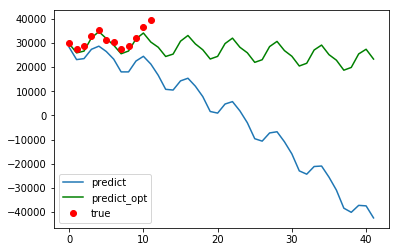

In [14]:
pred_dynamic = results.forecast(42)   
pred_dynamic_opt = results_opt.forecast(42)

plt.plot(pred_dynamic, label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинные значения 
plt.plot(data_m['PJME_MW'].values[-12:],'or',label='true')

plt.legend()

plt.show()

### Вывод: На недельных данных получилось лучше, с увеличением временного промежутка точность падает